<a href="https://colab.research.google.com/github/kimsang-kyu/Python_application/blob/main/20200429_%EC%9D%B4%EB%AF%B8%EC%A7%80%EC%B2%98%EB%A6%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#라이브러리 설치
!pip install opencv-python

In [ ]:
import cv2 
import numpy as np
from matplotlib import pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
img_file = '/content/drive/My Drive/파이썬활용/dark.png'
image_dark = cv2.imread(img_file)

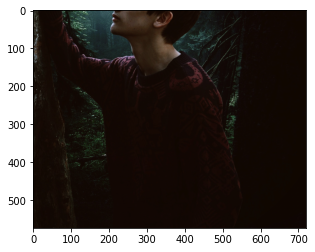

In [ ]:
image_rgb = cv2.cvtColor(image_dark, cv2.COLOR_BGR2RGB)
plt.imshow(image_rgb)
plt.show()

###감마 보정 - Gamma correction

> 감마값을 0을 기준 작게 크게 어둡게 밝게 조정가능 

> 50을 하면 밝고 170을하면 어두워짐?

> 감마는 0보다 큰 양수의 값을 가져야한다.

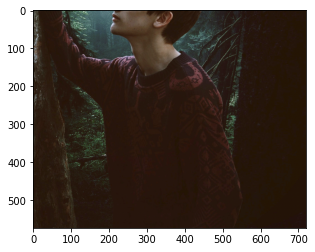

In [ ]:
#감마 보정
gamma = 0.7 #1보다 작으면 어두운부분 밝게 

lookUpTable = np.empty((1,256), np.uint8)
for i in range(256):
  lookUpTable[0,i] = np.clip(pow(i/255.0, gamma) * 255.0, 0, 255)
image_gamma = cv2.LUT(image,lookUpTable)

#RGB로 변환
image_rgb = cv2.cvtColor(image_gamma, cv2.COLOR_BGR2RGB)

#이미지는 출력
plt.imshow(image_rgb)
plt.show()

###임계처리

> 이미지 행렬에서 하나의 픽셀값을 사용자가 지정한 기준값을 사용하여 이진화하는 단순한 필터이다.

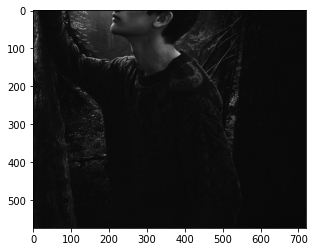

In [ ]:
#흑백이미지
image_gray = cv2.cvtColor(image_dark, cv2.COLOR_BGR2GRAY)
_, thresh = cv2.threshold(image_gray, 16, 255, cv2.THRESH_BINARY)

plt.imshow(thresh, 'gray')
plt.show()

In [ ]:
plt.imshow(thresh, 'gray')
plt.show()

16을 기준으로 0과 255를 나눠준다. #기준은 내가정함

어둡기때문에 어두운 부분이 많이나옴

값을 입력하는 것에 따라 해당하는 값의 흑과 백으로 2진화 시킬 수 있다.

threshold

과제 : 생닭 보정하기 ->  스무딩 밝기 조절 색조절 

python 이미지 필터